#### Import libraries

In [1270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import yfinance as yf
from pandas_datareader import data as pdr

#### Create paths

In [1271]:
# Paths
csv_path = Path() / "csv"
plots_path = Path() / "plots"

In [1272]:
df = pd.read_csv(csv_path / 'brickeconomy_new.csv')
timeseries = pd.read_csv(csv_path / 'time_series.csv', sep=";")
liquidity = pd.read_csv(csv_path /'liquidity.csv', sep=";") 

In [1273]:
df.head()

,Unnamed: 0.1,Unnamed: 0,number,name,theme,year,pieces,minifigs,availability,retired,released_date,retired_date,retail,value
0,0,0,75144-1,Snowspeeder,Star Wars,2017,1703,2,Exclusive,True,2017-05-05 00:00:00,2019-01-15 00:00:00,199.99,330.40
1,1,1,10251-1,Brick Bank,Icons,2016,2380,6,RetailLimited,True,2016-01-02 00:00:00,2018-11-14 00:00:00,149.99,494.81
2,2,2,10252-1,Volkswagen Beetle,Icons,2016,1167,0,Exclusive,True,2016-08-01 00:00:00,2020-12-03 00:00:00,89.99,113.14
3,3,3,10253-1,Big Ben,Icons,2016,4163,0,Exclusive,True,2016-07-02 00:00:00,2018-11-25 00:00:00,219.99,327.12
4,4,4,10702-1,Creative Building Set,Classic,2016,583,0,Retail,True,2016-01-02 00:00:00,2017-11-24 00:00:00,24.99,30.14


#### Trends

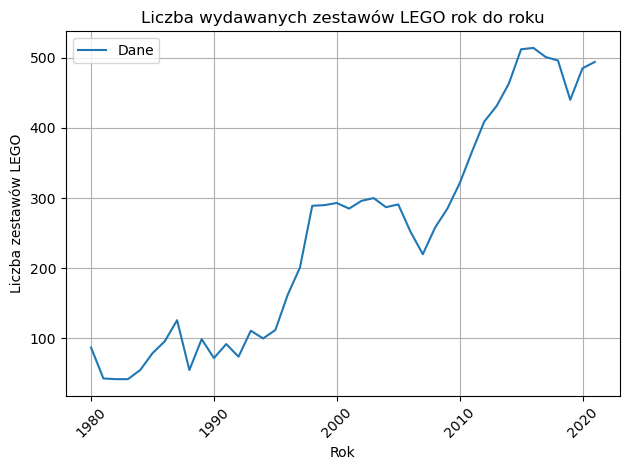

In [1274]:
# Number of sets released per year
sets_by_year = df.groupby("year").size().reset_index(name="number")

# Plot actual data
plt.plot(sets_by_year["year"][:-1], sets_by_year["number"][:-1], label="Dane")

# Configure plot
plt.legend()
plt.title('Liczba wydawanych zestawów LEGO rok do roku')
plt.xlabel("Rok")
plt.ylabel("Liczba zestawów LEGO")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig(plots_path / 'liczba_zestawów_rok_do_roku.pdf')
plt.show()

In [1275]:
#Sets released per year (table)
sets_by_year_table = df.groupby("year").count()
sets_by_year_table["number"]

year
1980     87
1981     43
1982     42
1983     42
1984     55
1985     79
1986     96
1987    126
1988     55
1989     99
1990     72
1991     92
1992     74
1993    111
1994    100
1995    112
1996    162
1997    201
1998    289
1999    290
2000    293
2001    285
2002    296
2003    300
2004    287
2005    291
2006    252
2007    220
2008    258
2009    285
2010    321
2011    366
2012    409
2013    431
2014    463
2015    512
2016    514
2017    501
2018    496
2019    440
2020    485
2021    494
2022    353
Name: number, dtype: int64

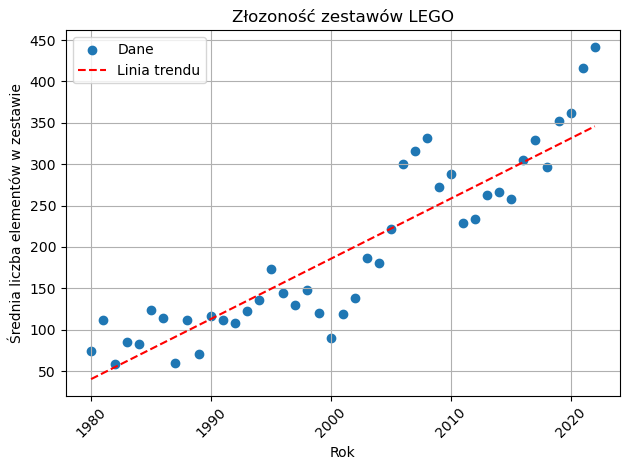

In [1276]:
# Complexity trend in LEGO sets per year
# Group the data by year and calculate the average number of parts per set
parts_per_set = df.groupby('year')['pieces'].mean()

# Create a scatter plot of the data
plt.scatter(parts_per_set.index, parts_per_set.values, label="Dane")

# Calculate the slope and intercept of the best fit line
slope, intercept, r_value, p_value, std_err = stats.linregress(parts_per_set.index[:-1], parts_per_set.values[:-1])

# Calculate the x and y values for the best fit line
x = np.array(parts_per_set.index)
y = intercept + slope * x

# Plot the best fit line
plt.plot(x, y, 'r--', label='Linia trendu')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.title('Złozoność zestawów LEGO')
plt.xlabel('Rok')
plt.ylabel('Średnia liczba elementów w zestawie')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(plots_path / 'złozoność_zestawów_rok_do_roku.pdf')
plt.show()

#### HPR/APR

In [1277]:
#filer database
df = df[(df['year'] >= 1980) & (df['year'] <= 2022)]
df = df[(df['pieces'] != 0)]
df = df[(df['retail'] != 0)]
df = df[(df['retired'] == True)]

#reset index (number rows ascending)
df = df.reset_index(drop=True)

In [1278]:
df.to_csv(csv_path / 'brickeconomy_new.csv')

In [1279]:
#create new columns (HPR, HPY, APR)
df['HPR'] = (df['value'] - df['retail']) / df['retail']
df['APR'] = ((df['HPR'] + 1) ** (1/(2024 - df['year']))) - 1

df

,Unnamed: 0.1,Unnamed: 0,number,name,theme,year,pieces,minifigs,availability,retired,released_date,retired_date,retail,value,HPR,APR
0,0,0,75144-1,Snowspeeder,Star Wars,2017,1703,2,Exclusive,True,2017-05-05 00:00:00,2019-01-15 00:00:00,199.99,330.40,0.652083,0.074354
1,1,1,10251-1,Brick Bank,Icons,2016,2380,6,RetailLimited,True,2016-01-02 00:00:00,2018-11-14 00:00:00,149.99,494.81,2.298953,0.160906
2,2,2,10252-1,Volkswagen Beetle,Icons,2016,1167,0,Exclusive,True,2016-08-01 00:00:00,2020-12-03 00:00:00,89.99,113.14,0.257251,0.029029
3,3,3,10253-1,Big Ben,Icons,2016,4163,0,Exclusive,True,2016-07-02 00:00:00,2018-11-25 00:00:00,219.99,327.12,0.486977,0.050843
4,4,4,10702-1,Creative Building Set,Classic,2016,583,0,Retail,True,2016-01-02 00:00:00,2017-11-24 00:00:00,24.99,30.14,0.206082,0.023699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10774,10774,16522,45809-1,City Shaper Challenge Kit,Education,2019,2238,1,Retail,True,2019-01-01 00:00:00,2021-01-01 00:00:00,175.99,338.05,0.920848,0.139459
10775,10775,16628,10659-2,Vehicle Suitcase,Juniors,2014,146,2,Retail,True,2014-01-01 00:00:00,2016-01-01 00:00:00,21.99,43.07,0.958618,0.069535
10776,10776,17306,9790-1,ROBOLAB Team Challenge Set,Education,1999,725,0,Retail,True,1999-01-01 00:00:00,2001-01-01 00:00:00,175.99,193.78,0.101085,0.003859
10777,10777,17307,2000443-1,Workshop Kit Freewheeler,Education,2015,82,1,RetailLimited,True,2015-01-01 00:00:00,2017-01-01 00:00:00,8.79,11.00,0.251422,0.025233


In [1280]:
#average APR per year
APR_yearly = df.groupby("year").mean('APR')
print(APR_yearly['APR'])

year
1980    0.051638
1981    0.075771
1982    0.060581
1983    0.076033
1984    0.074955
1985    0.080231
1986    0.069071
1987    0.059438
1988    0.082901
1989    0.065710
1990    0.067032
1991    0.067354
1992    0.072833
1993    0.064278
1994    0.070992
1995    0.060711
1996    0.062655
1997    0.063006
1998    0.059979
1999    0.066099
2000    0.057826
2001    0.072596
2002    0.070928
2003    0.072588
2004    0.078661
2005    0.083702
2006    0.089316
2007    0.087703
2008    0.092005
2009    0.084479
2010    0.080362
2011    0.088597
2012    0.095290
2013    0.085439
2014    0.095430
2015    0.091807
2016    0.095299
2017    0.092497
2018    0.085203
2019    0.077515
2020    0.082867
2021    0.090082
2022    0.104910
Name: APR, dtype: float64


In [1281]:
APR_mean = round(df['APR'].mean(), 6)
APR_mean

0.081777

In [1282]:
APR_by_themes = df.groupby("theme").mean('APR')
APR_by_themes = APR_by_themes.sort_values("APR", ascending=False)
APR_by_themes['APR']

theme
FORMA                        0.379361
BrickLink                    0.327697
Avatar The Last Airbender    0.183646
Mixels                       0.161662
BrickHeadz                   0.157204
                               ...   
DC Super Hero Girls          0.012488
LEGO Art                     0.012355
Trolls World Tour            0.003972
Horizon                     -0.062813
Avatar                      -0.097147
Name: APR, Length: 143, dtype: float64

In [1283]:
# Assuming df is your DataFrame and it has two columns: 'num_elements' and 'annual_return'
df['group'] = pd.cut(df['pieces'], bins=[0, 500, 1000, float('inf')], labels=['small', 'medium', 'big'])

# Calculate the average annual return for each group
grouped = df.groupby('group')['APR'].mean()

# Print the most profitable group
round(grouped, 3)

/var/folders/1k/rsc6z_156_36hpxhr9fbzsch0000gn/T/ipykernel_57701/1755315732.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('group')['APR'].mean()


group
small     0.085
medium    0.064
big       0.059
Name: APR, dtype: float64

In [1284]:
#highest APR values
df.sort_values("APR", ascending=False).head()

,Unnamed: 0.1,Unnamed: 0,number,name,theme,year,pieces,minifigs,availability,retired,released_date,retired_date,retail,value,HPR,APR,group
10384,10384,15397,6385891-1,Brick Lab,Promotional,2021,145,0,Exclusive,True,2021-01-01 00:00:00,2023-01-01 00:00:00,13.20,140.42,9.637879,1.199303,small
10619,10619,15850,71033-5,Kermit the Frog,Minifigure Series,2022,5,1,Retail,True,2022-05-01 00:00:00,2023-01-25 00:00:00,3.99,17.35,3.348371,1.085275,small
9268,9268,13534,853922-1,Creative Rings,Friends,2019,43,0,ExclusiveLEGOLAND,True,2019-01-01 00:00:00,2021-01-01 00:00:00,7.91,229.92,28.067004,0.961914,small
10357,10357,15355,10282-2,Adidas Originals Superstar X Footshop,Icons,2021,974,0,RetailLimited,True,2021-09-02 00:00:00,2023-09-02 00:00:00,89.99,632.67,6.030448,0.915701,medium
10392,10392,15412,43108-4,Dragon Guitarist,Vidiyo,2021,13,1,Retail,True,2021-11-01 00:00:00,2021-12-01 00:00:00,4.99,31.41,5.294589,0.846386,small


In [1285]:
#lowest APR values
df.sort_values("APR", ascending=True).head()

,Unnamed: 0.1,Unnamed: 0,number,name,theme,year,pieces,minifigs,availability,retired,released_date,retired_date,retail,value,HPR,APR,group
10590,10590,15766,76947-1,Quetzalcoatlus Plane Ambush,Jurassic World,2022,306,3,Retail,True,2022-04-17 00:00:00,2023-12-01 00:00:00,49.99,32.91,-0.341668,-0.188624,small
10648,10648,15908,41716-1,Stephanie's Sailing Adventure,Friends,2022,304,3,Retail,True,2022-05-29 00:00:00,2024-02-01 00:00:00,44.99,30.83,-0.314737,-0.172194,small
10543,10543,15660,76206-1,Iron Man Figure,Marvel Super Heroes,2022,381,0,Retail,True,2022-01-02 00:00:00,2023-12-31 00:00:00,44.99,31.54,-0.298955,-0.162716,small
10737,10737,16104,76911-1,007 Aston Martin DB5,Speed Champions,2022,298,1,Retail,True,2022-07-26 00:00:00,2023-12-31 00:00:00,24.99,17.59,-0.296118,-0.161024,small
10766,10766,16152,76220-1,Batman versus Harley Quinn,DC Comics Super Heroes,2022,42,2,Retail,True,2022-09-01 00:00:00,2023-12-01 00:00:00,14.99,10.56,-0.295530,-0.160673,small


[*********************100%%**********************]  3 of 3 completed
/var/folders/1k/rsc6z_156_36hpxhr9fbzsch0000gn/T/ipykernel_57701/1533132113.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  other_instruments = other_instruments.resample('M').last()


,BTC-USD,DAX,SP500,Gold
Date,,,,
2023-08-31,25931.472656,15947.080078,4507.660156,1940.095
2023-09-30,26967.916016,15386.580078,4288.049805,1848.490
2023-10-31,34667.781250,14810.339844,4193.799805,1984.650
2023-11-30,37712.746094,16215.429688,4567.799805,2036.195
2023-12-31,42156.902344,16751.640625,4769.830078,2063.235


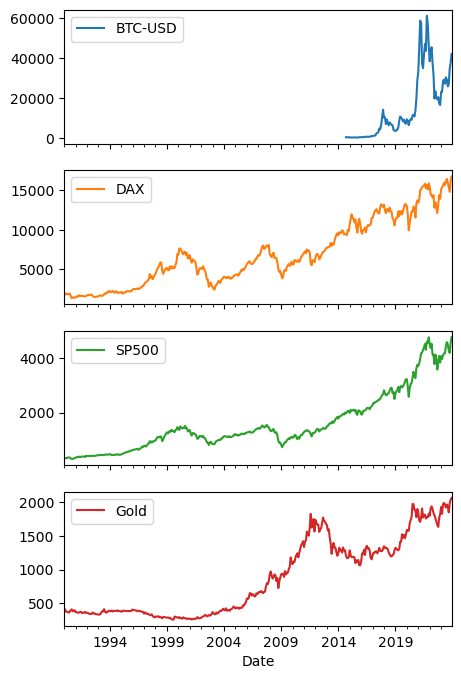

In [1286]:
yf.pdr_override()
other_instruments = pdr.get_data_yahoo(["^GSPC", "^GDAXI", "BTC-USD"], start="1990-01-01", end="2023-12-31")
other_instruments = other_instruments.resample('M').last()
other_instruments = other_instruments['Close']
other_instruments = other_instruments.rename(columns={'^GSPC': 'SP500', 'WIG20.WA': 'WIG20', '^GDAXI': 'DAX'})
gold_historical_data = pd.read_csv(csv_path / 'xauusd.csv')
other_instruments = other_instruments.reset_index()
other_instruments = other_instruments.join(gold_historical_data['Close'])
other_instruments = other_instruments.rename(columns={'Close': 'Gold'})

#Set 'Date' as index
other_instruments.set_index("Date", inplace=True)
other_instruments.plot(figsize=(5,8), subplots=True)
plt.savefig(plots_path / 'szeregi_długie_wszystkie.pdf')

other_instruments.tail()

In [1287]:
HPR_SP500 = (((other_instruments['SP500'].iloc[-1] - other_instruments['SP500'].iloc[0]) / other_instruments['SP500'].iloc[0]))
APR_SP500 = round(((HPR_SP500 + 1) ** (1/34)) - 1, 6)

HPR_DAX = (((other_instruments['DAX'].iloc[-1] - other_instruments['DAX'].iloc[0]) / other_instruments['DAX'].iloc[0]))
APR_DAX = round(((HPR_DAX + 1) ** (1/34)) - 1, 6)

HPR_Gold = (((other_instruments['Gold'].iloc[-1] - other_instruments['Gold'].iloc[0]) / other_instruments['Gold'].iloc[0]))
APR_Gold = round(((HPR_Gold + 1) ** (1/34)) - 1, 6)

HPR_BTC = ((other_instruments['BTC-USD'].iloc[-1] - other_instruments['BTC-USD'].iloc[300]) / other_instruments['BTC-USD'].iloc[300])
APR_BTC = round(((HPR_BTC + 1) ** (1/9)) - 1, 6)

APR_lego_1990 = round(df.loc[df['year'].isin(np.arange(1990, 2025, 1)), 'APR'].mean(), 6)

In [1288]:
print(f'APR for SP500: {APR_SP500}')
print(f'APR for DAX: {APR_DAX}')
print(f'APR for Gold: {APR_Gold}')
print(f'APR for BTC: {APR_BTC}')
print(f'APR for LEGO: {APR_lego_1990}')

APR for SP500: 0.081815
APR for DAX: 0.067441
APR for Gold: 0.048092
APR for BTC: 0.795414
APR for LEGO: 0.082779


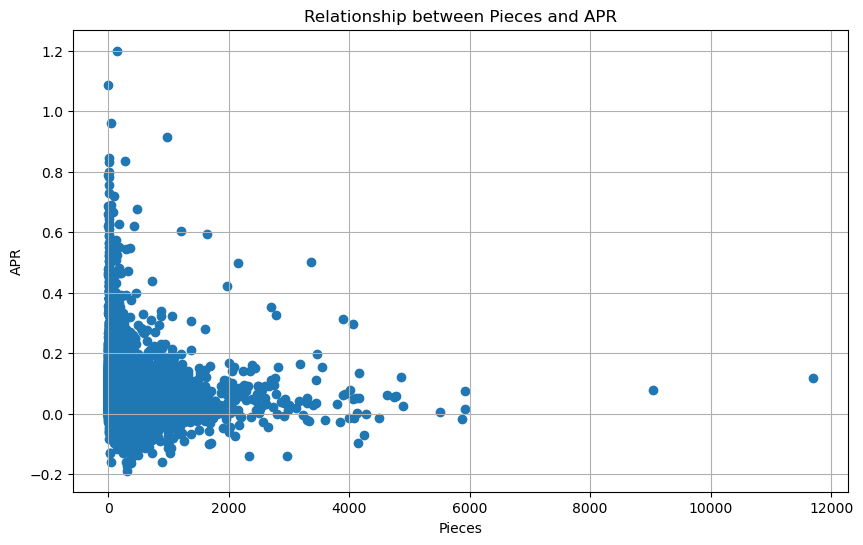

In [1289]:
plt.figure(figsize=(10, 6))
plt.scatter(df['pieces'], df['APR'])
plt.title('Relationship between Pieces and APR')
plt.xlabel('Pieces')
plt.ylabel('APR')
plt.grid(True)
plt.show()

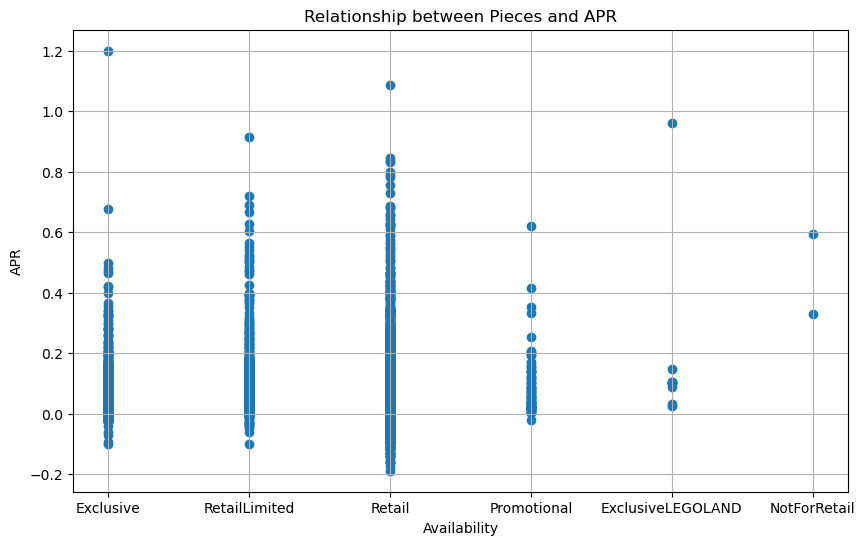

In [1290]:
plt.figure(figsize=(10, 6))
plt.scatter(df['availability'], df['APR'])
plt.title('Relationship between Pieces and APR')
plt.xlabel('Availability')
plt.ylabel('APR')
plt.grid(True)
plt.show()

In [1291]:
# Przekształcanie kolumn z datami na format daty
df['released_date'] = pd.to_datetime(df['released_date'])
df['retired_date'] = pd.to_datetime(df['retired_date'])

# Ekstrahowanie miesiąca z dat wydania i wycofania
df['released_month'] = df['released_date'].dt.month
df['retired_month'] = df['retired_date'].dt.month

# Grupowanie danych według miesięcy wydania i wycofania
release_monthly = df['released_month'].value_counts().sort_index()
retire_monthly = df['retired_month'].value_counts().sort_index()

In [1292]:
# Obliczanie czasu na rynku w dniach
df['time_on_market'] = (df['retired_date'] - df['released_date']).dt.days

# Obliczanie średniego czasu na rynku
average_time_on_market = df['time_on_market'].mean()

average_time_on_market, df['time_on_market'].min(), df['time_on_market'].max()

(594.6225994990259, 0, 4729)

In [1293]:
df.head()

,Unnamed: 0.1,Unnamed: 0,number,name,theme,year,pieces,minifigs,availability,retired,released_date,retired_date,retail,value,HPR,APR,group,released_month,retired_month,time_on_market
0,0,0,75144-1,Snowspeeder,Star Wars,2017,1703,2,Exclusive,True,2017-05-05,2019-01-15,199.99,330.40,0.652083,0.074354,big,5,1,620
1,1,1,10251-1,Brick Bank,Icons,2016,2380,6,RetailLimited,True,2016-01-02,2018-11-14,149.99,494.81,2.298953,0.160906,big,1,11,1047
2,2,2,10252-1,Volkswagen Beetle,Icons,2016,1167,0,Exclusive,True,2016-08-01,2020-12-03,89.99,113.14,0.257251,0.029029,big,8,12,1585
3,3,3,10253-1,Big Ben,Icons,2016,4163,0,Exclusive,True,2016-07-02,2018-11-25,219.99,327.12,0.486977,0.050843,big,7,11,876
4,4,4,10702-1,Creative Building Set,Classic,2016,583,0,Retail,True,2016-01-02,2017-11-24,24.99,30.14,0.206082,0.023699,medium,1,11,692


In [1294]:
timeseries.head()

,set_num,name_sets,year,theme_id,num_parts,name_themes,retail_price,sty.21,lut.21,mar.21,...,mar.23,kwi.23,maj.23,cze.23,lip.23,sie.23,wrz.23,paź.23,lis.23,gru.23
0,5289-1,Toggle Joints & Connectors,1996,453,64,Technic,3.95,9.30,8.87,9.34,...,9.31,8.08,7.91,6.83,8.43,7.91,6.32,8.13,7.91,7.01
1,7121-1,Naboo Swamp,1999,158,82,Star Wars,8.79,60.92,56.85,56.33,...,72.70,58.29,71.98,91.15,79.82,70.74,85.92,91.52,71.70,66.79
2,7111-1,Droid Fighter,1999,158,62,Star Wars,5.27,28.77,27.33,32.72,...,46.50,54.41,42.72,48.57,42.17,56.06,47.54,41.01,50.64,39.90
3,7171-1,Mos Espa Podrace,1999,158,907,Star Wars,79.19,275.43,327.97,367.35,...,333.09,304.65,323.50,339.89,334.51,433.46,367.34,431.05,375.69,349.02
4,7104-1,Desert Skiff,2000,158,55,Star Wars,5.27,66.64,46.98,62.45,...,64.62,62.74,68.10,77.60,66.18,64.22,79.69,74.27,65.38,59.95


In [1295]:
timeseries = timeseries.dropna(subset=['retail_price'])
timeseries = timeseries.reset_index(drop=True)
timeseries = timeseries.sort_values(by='year')
timeseries = timeseries.replace(',', '.')

In [1296]:
average_values = timeseries.iloc[:, 8:].apply(lambda x: x.mean(), axis=0)
average_values_list = average_values.tolist()

average_values_rounded = [round(x, 6) for x in average_values_list]

average_values_rounded_series = pd.Series(average_values_rounded, name='average_values_rounded')
average_values_rounded_series.name = 'average_values_rounded'
timeseries['average_values_rounded'] = average_values_rounded_series

LEGO_basket = pd.DataFrame(average_values_rounded_series)

[*********************100%%**********************]  4 of 4 completed
/var/folders/1k/rsc6z_156_36hpxhr9fbzsch0000gn/T/ipykernel_57701/3054895229.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  other_instruments = other_instruments.resample('M').last()


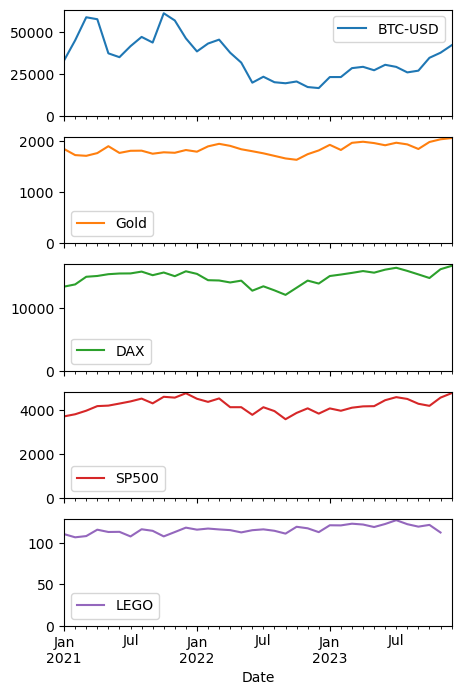

In [1297]:
yf.pdr_override()
other_instruments = pdr.get_data_yahoo(["GC=F", "^GSPC", "^GDAXI", "BTC-USD"], start="2021-01-01", end="2023-12-31")
other_instruments = other_instruments.resample('M').last()
other_instruments = other_instruments['Close']
other_instruments = other_instruments.reset_index()

#merge LEGO_basket and other_investments
all_instruments = pd.concat([other_instruments, LEGO_basket], axis=1)
all_instruments= all_instruments.rename(columns={'GC=F': 'Gold', '^GSPC': 'SP500', 'WIG20.WA': 'WIG20', '^GDAXI': 'DAX','average_values_rounded': 'LEGO'})

#Set 'Date' as index
all_instruments.set_index("Date", inplace=True)
all_instruments.plot(figsize=(5,8), subplots=True)

# Set the minimum value on the y-axis to 0 for all subplots
for ax in plt.gcf().get_axes():
    ax.set_ylim(bottom=0)

plt.savefig(plots_path / 'szeregi_czasowe_od_zera_wszystkie.pdf')

plt.show()

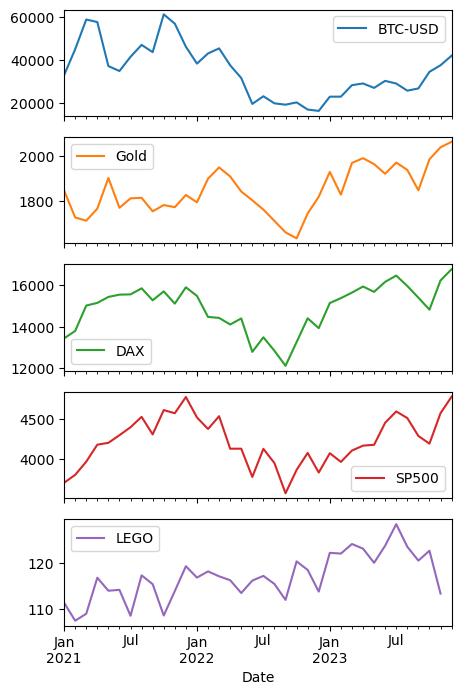

In [1298]:
all_instruments.plot(figsize=(5,8), subplots=True)
plt.savefig(plots_path / 'szeregi_czasowe_wszystkie.pdf')

In [1299]:
all_instruments.tail()

,BTC-USD,Gold,DAX,SP500,LEGO
Date,,,,,
2023-08-31,25931.472656,1938.199951,15947.080078,4507.660156,123.486562
2023-09-30,26967.916016,1848.099976,15386.580078,4288.049805,120.485208
2023-10-31,34667.781250,1985.199951,14810.339844,4193.799805,122.621667
2023-11-30,37712.746094,2038.099976,16215.429688,4567.799805,113.352917
2023-12-31,42156.902344,2062.399902,16751.640625,4769.830078,NaN


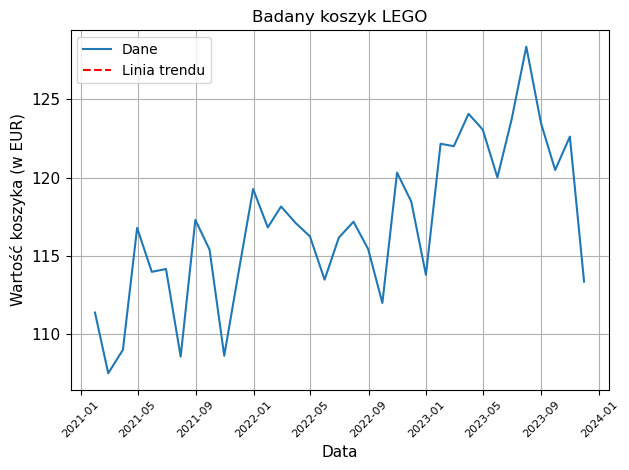

In [1300]:
x = all_instruments.index.to_numpy()
y = all_instruments['LEGO'].to_numpy()

# Convert the datetime64 array to a Unix timestamp array
x_unix_timestamps = (x - np.datetime64('1970-01-01')) / np.timedelta64(1)

# Fit a polynomial of degree 1 (a straight line) to the data
fit = np.polyfit(x_unix_timestamps, y, 1)

# Generate the equation of the fit line
fit_line = np.poly1d(fit)

# Plot the original data
plt.plot(x, y, label='Dane')

# Plot the fit line
plt.plot(x, fit_line(x_unix_timestamps), 'r--', label='Linia trendu')

# Show the plot
plt.title('Badany koszyk LEGO')
plt.xticks(fontsize=8)
plt.yticks(fontsize=11)
plt.ylabel('Wartość koszyka (w EUR)', fontsize=11)
plt.xlabel('Data', fontsize=11)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(plots_path / 'koszyk_lego.pdf')
plt.show()

#### Volatility:

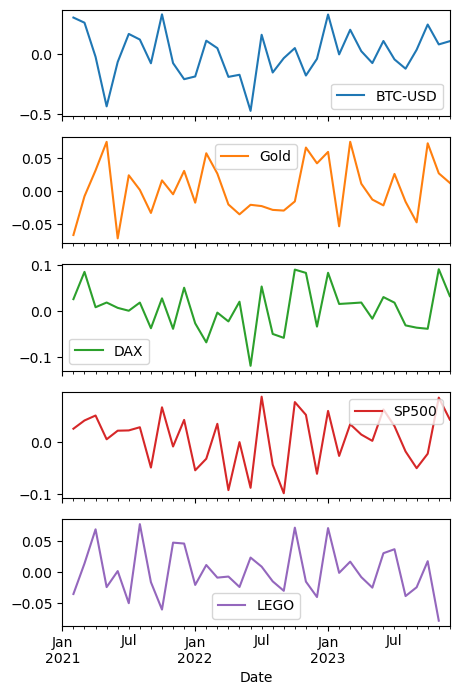

In [1301]:
#PCT change
instruments = ['BTC-USD', 'Gold', 'DAX', 'SP500', 'LEGO']
price_change = np.log(all_instruments[instruments] / all_instruments[instruments].shift(1))
price_change.plot(figsize=(5,8), subplots=True)
plt.savefig(plots_path /'price_change.pdf')

In [1302]:
#Calculate std of returns of each column
std_dev = price_change.std()
std_dev

BTC-USD    0.193572
Gold       0.040213
DAX        0.048672
SP500      0.051335
LEGO       0.039172
dtype: float64

In [1303]:
#Coefficient of Variation
COV = (all_instruments.std()/all_instruments.mean())*100
COV

BTC-USD    35.462637
Gold        5.724456
DAX         7.533373
SP500       7.115718
LEGO        4.274770
dtype: float64

In [1304]:
def drawdown(price_change):
    price_change.fillna(0.0, inplace=True)
    cumulative = (price_change + 1).cumprod()
    running_max = np.maximum.accumulate(cumulative)

    return (cumulative - running_max) / running_max

/opt/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


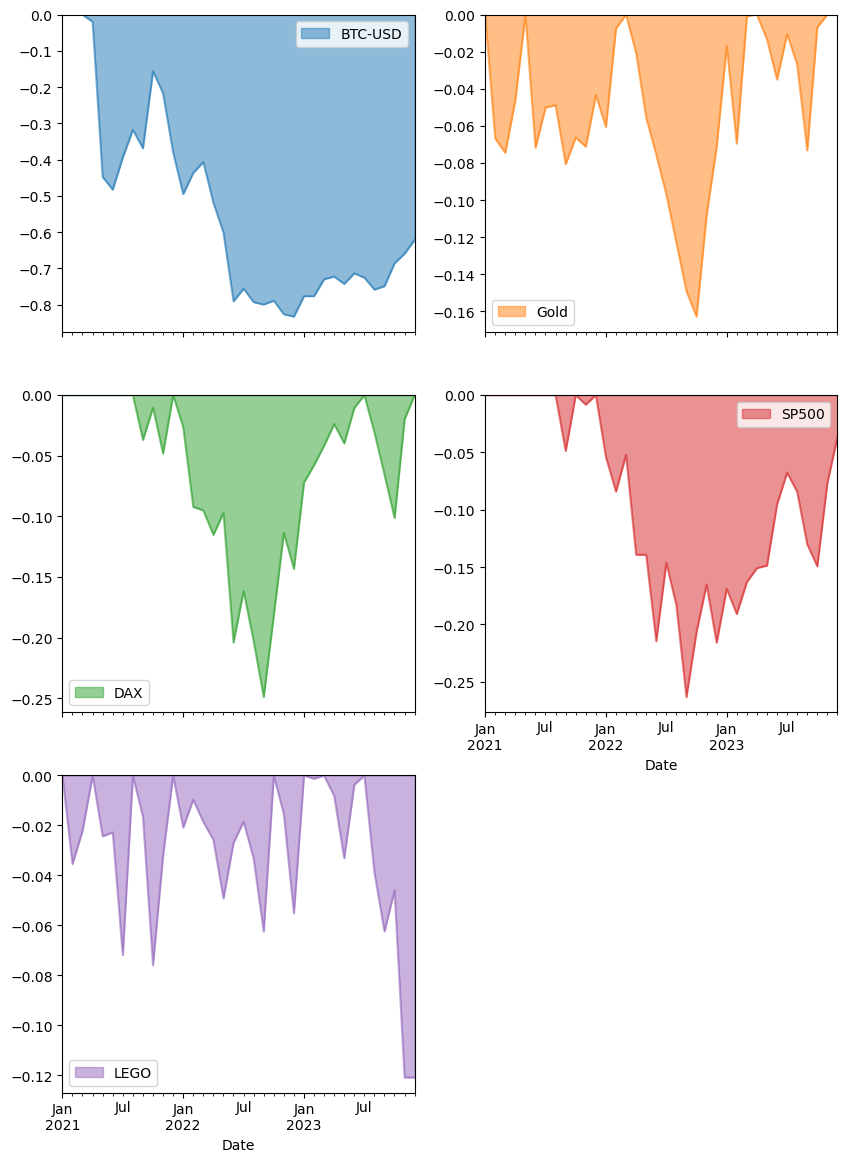

In [1305]:
drawdown(price_change).plot(kind="area", alpha=0.5, subplots=True, layout=(3, 2), figsize=(10,14))
plt.savefig(plots_path / 'max_drawdown.pdf')

In [1306]:
assets = ['BTC-USD', 'Gold', 'DAX', 'SP500', 'LEGO']
for asset in assets:
    md = np.min(drawdown(price_change[asset]))
    print(f'Maximum drawdown for {asset} was {round(np.min(drawdown(price_change[asset])), 2)}')

Maximum drawdown for BTC-USD was -0.83
Maximum drawdown for Gold was -0.16
Maximum drawdown for DAX was -0.25
Maximum drawdown for SP500 was -0.26
Maximum drawdown for LEGO was -0.12


#### Correlation matrix:

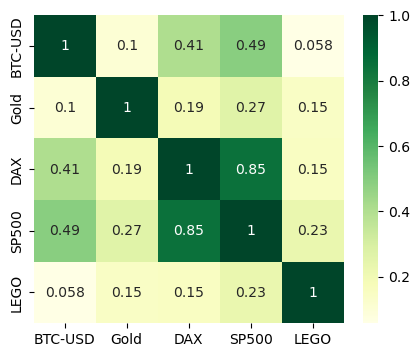

In [1307]:
#correlation (price_change)
corr_matrix_price_change = price_change.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix_price_change, annot=True, cmap='YlGn')
plt.savefig(plots_path / 'correlation_price_change.pdf')

plt.show()

#### Liquidity:

In [1308]:
#read csv file
sales_mean =float(liquidity['num_of_sales_in_2023'].dropna().mean())
sales_mean

118.48958333333333

In [1309]:
#average time needed to sell a set
time_needed = 365 / sales_mean
print(f'Average time needed to sell a set: {round(time_needed, 2)}')

Average time needed to sell a set: 3.08
